# Vignette: Visualize ancIBD output
This notebook walks you through examples how to use ancIBD visualizations. Get the most out of your IBD calls by using crisp visualizations out of the box!

In [1]:
### First do Imports
import sys as sys
import matplotlib.cm as cm
import pandas as pd
import os as os

### [Optional] The following code gives a clean Arial font on your plots
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']

### Edit the  following path to link to your Vignette folder
path = "/n/groups/reich/hringbauer/git/hapBLOCK/notebook/vignette/"
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())

### The following Code can manually overwrite the working directory to your ancIBD package
### Only uncomment if you want to use not the pip installed package
#sys.path.insert(0,"/n/groups/reich/hringbauer/git/hapBLOCK/package/")  # hack to get development package first in path

/n/groups/reich/hringbauer/git/hapBLOCK/notebook/vignette


# A) Run and visualize ancIBD for a pair of chromosomes
This functios runs and visualizes IBD along a single pair of chromosomes. It is very useful to manually inspect IBD calls. Calling IBD for a pair of chromosomes is very quick (it only needs a few seconds).

**The value of this plotting function cannot be overstressed -  manually inspecting the data supporting an IBD call is a great QC.**

Importantly, it visualizes the genomic distribution of opposing homozygotes. This are markers where both indivdiuals have homozygote for a different allele - and those markers rule out being in IBD. Observing long gaps without such markers is a strong signal for IBD - a signal implicitly used by most IBD callers.

In the plot below, the blue bars on top of the plot are the inferred IBD. The maroon line is the posterior.
The dots on top or the bottom visualize an opposing homozygote (up: yes, down: no). Only SNPs where both individuals have Genotype Probability > 0.99 for the maximum likelihood genotype are visualized.

In [2]:
from ancIBD.run import run_plot_pair

Filtering to 0.99 GP variants: 0.954x
Filtering to 0.99 GP variants: 0.848x
Filtering to common GP variants: 0.827x
Plotting 69063 markers


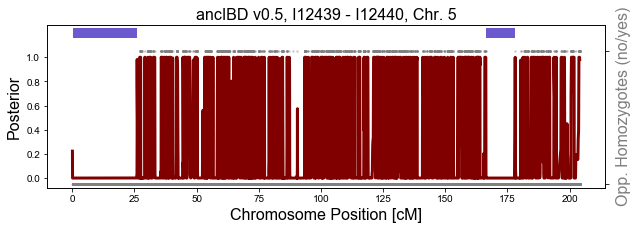

In [3]:
iids = ["I12439", "I12440"]	

run_plot_pair(iids=iids, ch=5, plot=True, xlim=[],
              path_h5 = "./data/hdf5/example_hazelton_chr" ,
              min_cm=6, l_model='h5', e_model='haploid_gl2', p_col='variants/RAF', ms=1.5,
              path_fig="", fs_l=16, figsize=(10,3))

# B) Plot Karyotype Plot of IBD
This function depicts IBD between a pair of indivdiuals along their chromosomes.

It needs that ancIBD output with a table of IBD (including their start and end) exists. 

In [4]:
from ancIBD.plot.plot_karyotype import plot_karyo_from_ibd_df

### Load the IBD Data
This is one output table from ancIBD, a tabular seperated table (.tsv) file that includes the genomic start and end position of each inferred IBD block.

In [5]:
path_ibd = "./output/ibd_hazelton/ch_all.tsv"
df_ibd = pd.read_csv(path_ibd, sep="\t")

Found: 30 Pairs fitting in dataframe.



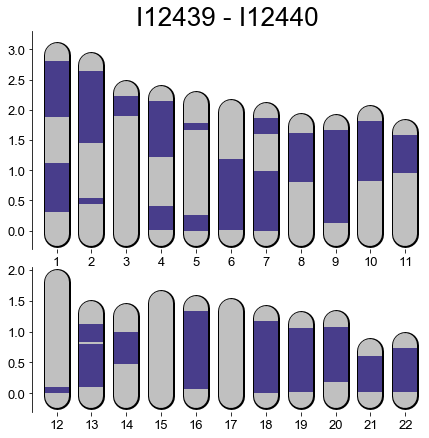

In [6]:
plot_karyo_from_ibd_df(df_ibd, iids=["I12439", "I12440"], min_cm=8, savepath="", 
                       title="I12439 - I12440")

# C) Plot the Length Distribution of IBD for a pair of indvidiuals
Plotting the length distribution can be useful to evalutate different possible kinships that produce a pair of individuals with multiple IBD. Note: Beyond third degree, there simply is biological variation and overlap between different classes of relatives.

### Expert Note: 
The comm_ancs, ms, and labels keywords are optional. These are lists, with each entry describing the property of the "expectation" curves. These parameters can be changed to show the expectations for various types of relationships.
- ms: Number of seperating meiosis. The number of generations between the relates. E.g. 4 for first cousins. For directly ancestral there is an additional complication - recombination breakpoints in the ancestor are not seen in inferred IBD - so set m one genaration less.
- comm_ancs: Number of common ancestral haplotypes. For a directly ancestral relationship or a hal-sib this is 2. For a relationship via two parents (e.g. siblings of nephew-aunt) it is 4.

In [7]:
from ancIBD.plot.plot_karyotype import plot_pde_individual_from_ibd_df

Found: 20 Pairs fitting in dataframe.



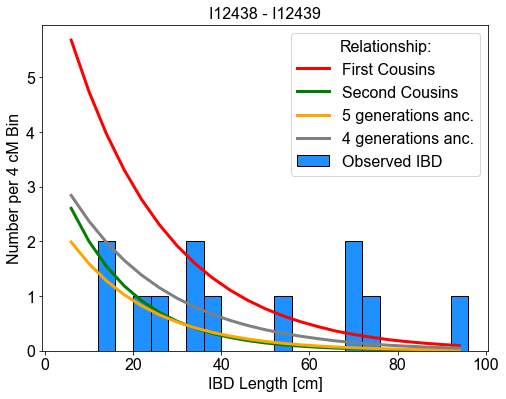

In [8]:
plot_pde_individual_from_ibd_df(df_ibd, iids=["I12438", "I12439"],
                                savepath="", title="I12438 - I12439",
                                comm_ancs=[4, 4, 2, 2], ms=[4, 6, 5, 4],
                                labels=['First Cousins', 'Second Cousins', '5 generations anc.', '4 generations anc.'],)

It looks like we found two parent offspring, two second-degree relatives (in ancestral manner), one third, one ~fouth-degree relative as well as one ~sixth-degree relative pair. All this lines up with the known pedigree from Hazelton. The relatives are via a half-sib - thus they appear in the "ancestral" cluster.